In [ ]:
#Import libraries

import pandas as pd
import os
import numpy as np
import seaborn as sns

   1. Read the dataset correctly using pandas, using an appropriate column as index (1 point)

In [4]:
# Import data set
directory = '/Users/maxfranco/Desktop/MBD/Term 2/Statistical Programming/Assigment 2 Titanic'
file = os.path.join(directory, 'train.csv')

titanic = pd.read_csv(file)

In [5]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [275]:
titanic.dtypes

PassengerId       int64
Survived          int32
Pclass         category
Name             object
Sex              object
Age             float64
SibSp             int32
Parch             int32
Ticket           object
Fare            float64
Cabin            object
Embarked       category
dtype: object

In [274]:
#Setting column types
titanic[['Survived', 'SibSp', 'Parch']] = titanic[['Survived', 'SibSp', 'Parch']].astype('int32') 
titanic[['Age', 'Fare']] = titanic[['Age', 'Fare']].astype('float')
titanic[['Embarked', 'Pclass']] = titanic[['Embarked', 'Pclass']].astype('category')


 2. Compute the percentage of survivors out of total number of passengers and the percentage of men and women out of total number of  passengers (0.5 points)

In [276]:
#Grouping by sex using values of survived dividing by the sum of rows in the titanic df that survived
total_aboard = titanic.shape[0] #Saving the total numbers of passengers in the ship
bysex_survived  = titanic.groupby('Sex')[['Survived']].sum()/total_aboard*100
bysex_survived

,Survived
Sex,
female,26.150393
male,12.233446


In [277]:
#Grouping by sex using values of PassengerID dividing by the count in the titanic df that survived
tpass = titanic.groupby('Sex')[['PassengerId']].count()/total_aboard*100
tpass.columns = ['Passengers']
tpass

,Passengers
Sex,
female,35.241302
male,64.758698



   3. Compute the percentage of survivors by sex (i.e. the percentage of male passengers that survived and female passengers that survived) and the percentage of survivors that were men and women (0.5 points)

In [278]:
#Creating Dataframe
t3 =titanic.groupby(["Sex","Survived"])['PassengerId'].count() 

#Reshaping in 2X2
t3 = t3.unstack(level= 'Sex')

# Calculating amount of survivors to find %
t_dead =t3.iloc[0].sum()
t_survived =t3.iloc[1].sum()

#making Calculation
t3.iloc[0] = t3.iloc[0]/t_dead*100
t3.iloc[1] = t3.iloc[1]/t_survived*100

#ranaming rows
t3.rename(index = {0: 'Dead', 1 :"Survived"}, inplace = True)

In [279]:
t3

Sex,female,male
Survived,,
Dead,14.754098,85.245902
Survived,68.128655,31.871345



   4. Display in a 2 x 2 DataFrame the probability of being male/female and surviving/not surviving (0.5 points)

In [280]:
#Creating Dataframe
survived_sex = titanic.groupby(["Sex","Survived"])['PassengerId'].count() 
#Reshaping in 2X2
survived_sex = survived_sex.unstack(level= 'Survived')

# Calculating amount of male & feamale passenger to find %
total_f = survived_sex.loc['female'].sum()
total_m = survived_sex.loc['male'].sum()

#making Calculation
survived_sex.loc['female'] = survived_sex.loc['female']/total_f*100
survived_sex.loc['male'] = survived_sex.loc['male']/total_m*100

#renaming columns
survived_sex.columns = ['Dead', 'Survived']

In [281]:
survived_sex

,Dead,Survived
Sex,,
female,25.796178,74.203822
male,81.109185,18.890815


Part II: Imputing missing values (2 points)


First  we run a pearson correlation to see if any of the other variables has strong correlation with the age of the people and we see non

In [282]:
correlation = titanic.corr(method= 'pearson')

correlation.loc['Age']

PassengerId    0.036847
Survived      -0.077221
Age            1.000000
SibSp         -0.308247
Parch         -0.189119
Fare           0.096067
Name: Age, dtype: float64

So the next option is look into grouping the ages by variable the could best describe the people with missing values, so we user Class and Sex

In [295]:
agegrouping=titanic.groupby(['Pclass', 'Sex'])["Age"].describe()
agegrouping

count       mean        std   min     25%   50%    75%   max
Pclass Sex                                                                 
1      female   85.0  34.611765  13.612052  2.00  23.000  35.0  44.00  63.0
       male    101.0  41.281386  15.139570  0.92  30.000  40.0  51.00  80.0
2      female   74.0  28.722973  12.872702  2.00  22.250  28.0  36.00  57.0
       male     99.0  30.740707  14.793894  0.67  23.000  30.0  36.75  70.0
3      female  102.0  21.750000  12.729964  0.75  14.125  21.5  29.75  63.0
       male    253.0  26.507589  12.159514  0.42  20.000  25.0  33.00  74.0

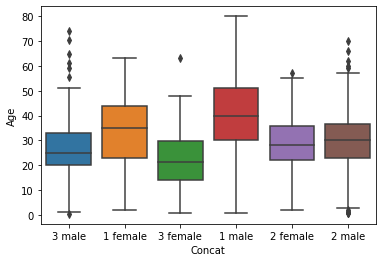

In [293]:
boxplot = titanic.loc[:,['Pclass', 'Sex', 'Age']]
boxplot['Concat'] =boxplot['Pclass'].astype(str) + " " +boxplot['Sex'].astype(str)

graph = sns.boxplot(x="Concat", y="Age", data=boxplot)

Although not ideal like running model to predict dates this seems to be pretty good way to fill the NAs. So we decide to go ahead and fill it with the median of each group

In [307]:
agegrouping2=titanic.groupby(['Pclass', 'Sex'])["Age"].median()
agegrouping2

Pclass  Sex   
1       female    35.0
        male      40.0
2       female    28.0
        male      30.0
3       female    21.5
        male      25.0
Name: Age, dtype: float64

In [302]:
titanic.Age.fillna(titanic.groupby(['Sex','Pclass']).transform('median').Age, inplace=True)

In [306]:
titanic.Age.isna().sum()

0

In [ ]:
titanic.map(lambda row: )